# Módulo 3: Resultados

## Introducción

Este módulo presenta los resultados finales obtenidos en el proyecto, organizados en dos partes principales para facilitar la comprensión y resaltar los aspectos clave:

- **Resultados Princ y Conclusionesipales**  
  En esta sección, se muestran los resultados finales del proyecto, incluyendo el impacto de los modelos de Machine Learning en la estrategia de trading. Esta parte está diseñada para ofrecer una visión general rápida y efectiva sobre los logros y mejoras alcanzadas, sin entrar en detalles técnicos.

- **Cálculos y Evaluaciones Detalladas**  
  Esta segunda parte está dirigida a quienes desean profundizar en el proceso de modelado, los cálculos y la evaluación detallada de cada modelo. Aquí se analizan los umbrales de decisión, métricas de evaluación, curvas ROC, y distribuciones de probabilidad para cada uno de los modelos de largos, cortos y combinado.

Esta estructura permite a los lectores interesados en una visión general enfocarse en los resultados y conclusiones principales, mientras que aquellos interesados en la metodología y análisis detallado pueden explorar la segunda parte para obtener información más profunda.
da parte.


## Parte 1: Resultados Principales

### Métricas globables Backtest Estrategia vs Backtest ML

In [104]:
from IPython.display import display, HTML

display(HTML(f"""
<div style="display: flex;">
    <div style="width: 50%; padding-right: 10px;">
        <h3>Backtest Estrategia </h3>
        <pre>{stats_prueba}</pre>
    </div>
    <div style="width: 50%; padding-left: 10px;">
        <h3>Backtest Estrategia ML </h3>
        <pre>{stats_combined}</pre>
    </div>
</div>
"""))

### Métricas claves Backtest Estrategia vs Backtest ML

,Metric,Original Strategy,ML Filtered Strategy
0,# Trades,175.000000,87.000000
1,Win Rate [%],38.857143,47.126437
2,Max. Drawdown [%],-38.189009,-12.001662
3,Return [%],-38.063100,-4.663950


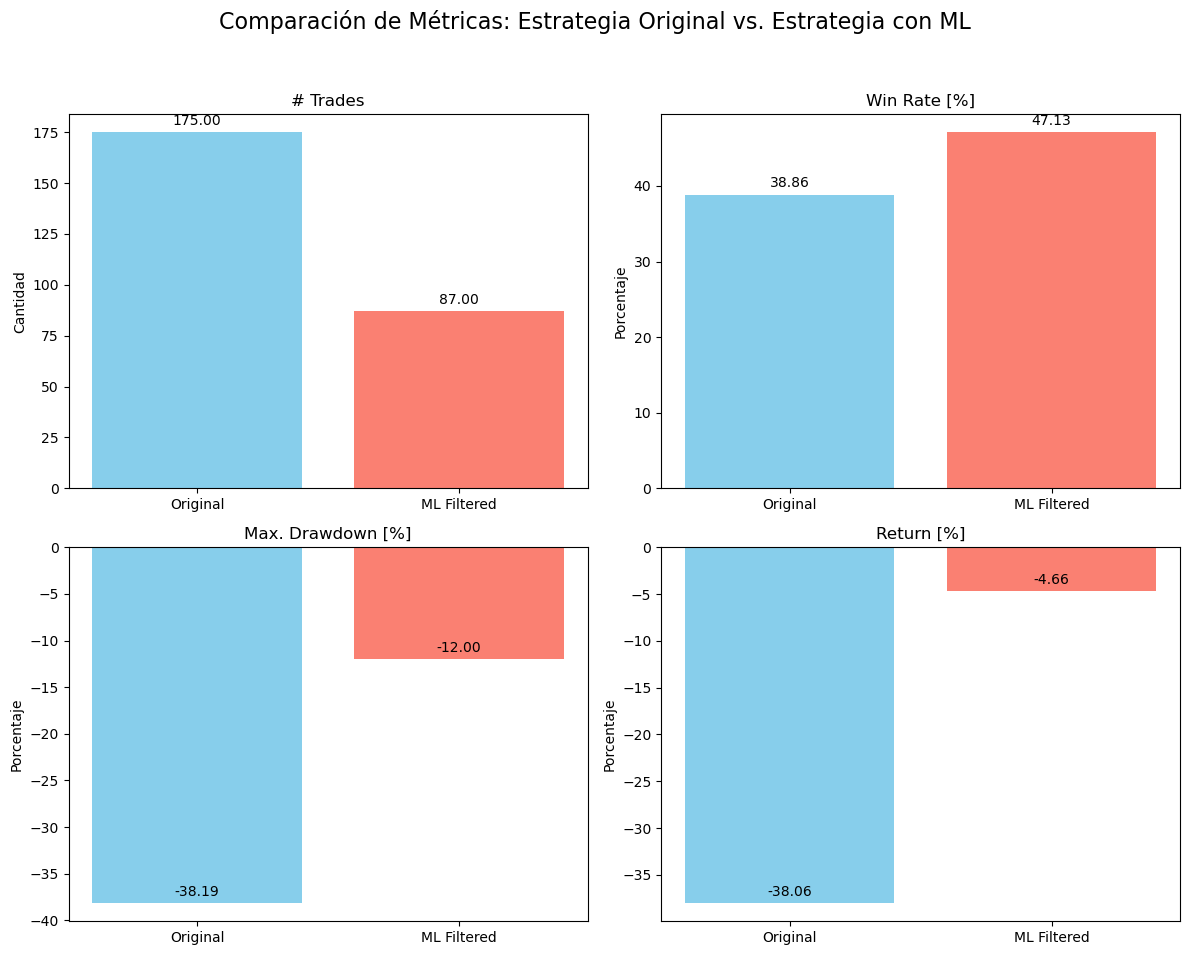

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear un DataFrame para organizar y comparar las métricas clave
metrics_data = {
    'Metric': [
        '# Trades', 'Win Rate [%]', 'Max. Drawdown [%]', 'Return [%]'
    ],
    'Original Strategy': [
        stats_prueba['# Trades'], stats_prueba['Win Rate [%]'], 
        stats_prueba['Max. Drawdown [%]'], stats_prueba['Return [%]']
    ],
    'ML Filtered Strategy': [
        stats_combined['# Trades'], stats_combined['Win Rate [%]'], 
        stats_combined['Max. Drawdown [%]'], stats_combined['Return [%]']
    ]
}

# Convertir a DataFrame para visualizar en formato de tabla
df_metrics = pd.DataFrame(metrics_data)
display(df_metrics)  # Esto mostrará el DataFrame con las métricas en Jupyter Notebook

# Crear gráficos de comparación para las métricas clave
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Comparación de Métricas: Estrategia Original vs. Estrategia con ML', fontsize=16)

# Función para añadir etiquetas a las barras
def add_labels(ax, rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

# Gráfico para # Trades
bars = axs[0, 0].bar(['Original', 'ML Filtered'], [stats_prueba['# Trades'], stats_combined['# Trades']], color=['skyblue', 'salmon'])
axs[0, 0].set_title('# Trades')
axs[0, 0].set_ylabel('Cantidad')
add_labels(axs[0, 0], bars)

# Gráfico para Win Rate
bars = axs[0, 1].bar(['Original', 'ML Filtered'], [stats_prueba['Win Rate [%]'], stats_combined['Win Rate [%]']], color=['skyblue', 'salmon'])
axs[0, 1].set_title('Win Rate [%]')
axs[0, 1].set_ylabel('Porcentaje')
add_labels(axs[0, 1], bars)

# Gráfico para Max. Drawdown
bars = axs[1, 0].bar(['Original', 'ML Filtered'], [stats_prueba['Max. Drawdown [%]'], stats_combined['Max. Drawdown [%]']], color=['skyblue', 'salmon'])
axs[1, 0].set_title('Max. Drawdown [%]')
axs[1, 0].set_ylabel('Porcentaje')
add_labels(axs[1, 0], bars)

# Gráfico para Return
bars = axs[1, 1].bar(['Original', 'ML Filtered'], [stats_prueba['Return [%]'], stats_combined['Return [%]']], color=['skyblue', 'salmon'])
axs[1, 1].set_title('Return [%]')
axs[1, 1].set_ylabel('Porcentaje')
add_labels(axs[1, 1], bars)

# Ajuste de espacio y visualización
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Diferencia entre curvas de equidad Backtest Estrategia vs Backtest ML

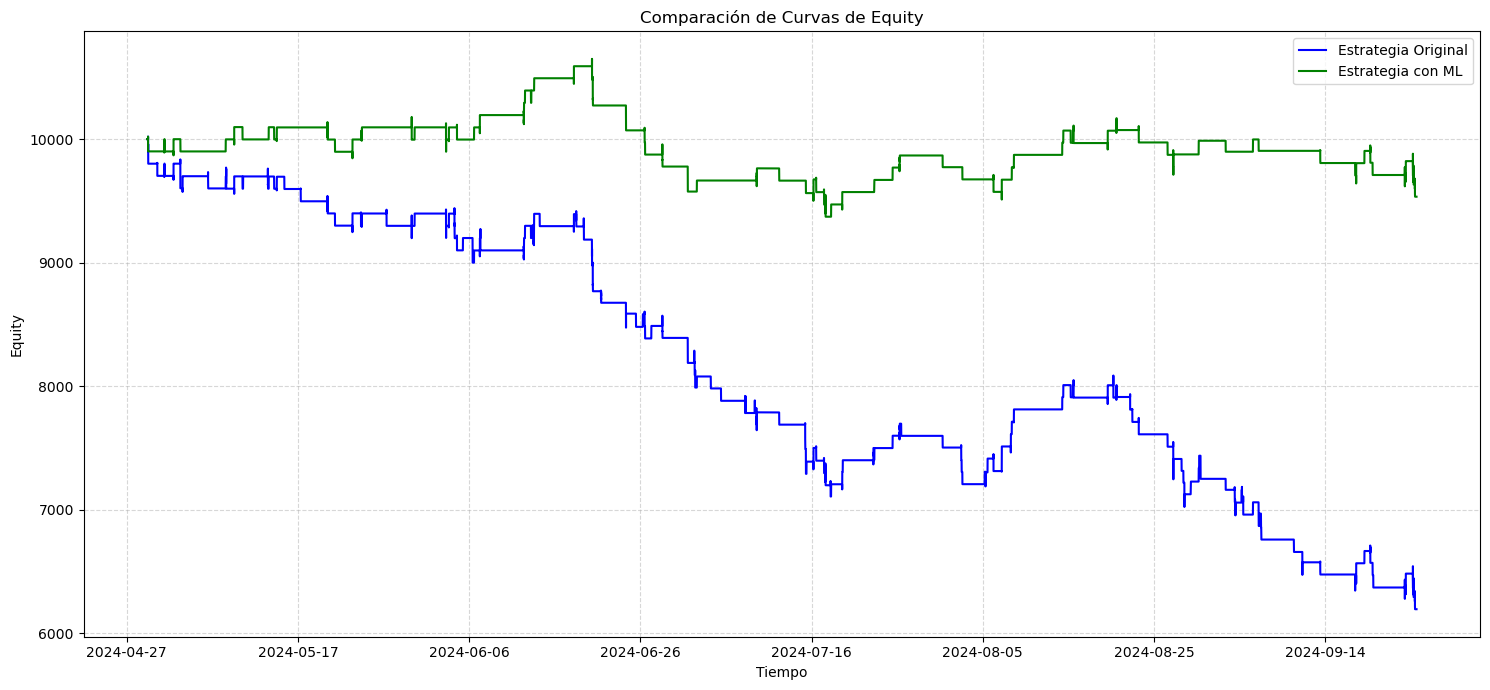

In [106]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Función para graficar la curva de equity para dos backtests
def plot_equity_comparison(stats_original, stats_ml, title='Comparación de Curvas de Equity'):
    """
    Genera un gráfico comparativo de las curvas de equity de dos backtests.

    Parámetros:
    - stats_original: resultados del backtest de la estrategia original.
    - stats_ml: resultados del backtest de la estrategia filtrada por ML.
    - title: título opcional para el gráfico.
    """
    # Obtener la curva de equity desde los resultados de cada backtest
    equity_curve_original = stats_original['_equity_curve']
    equity_original = equity_curve_original['Equity']
    
    equity_curve_ml = stats_ml['_equity_curve']
    equity_ml = equity_curve_ml['Equity']

    # Crear gráfico
    plt.figure(figsize=(15, 7))
    plt.plot(equity_original.index, equity_original, label='Estrategia Original', color='blue')
    plt.plot(equity_ml.index, equity_ml, label='Estrategia con ML', color='green')
    
    plt.title(title)
    plt.xlabel('Tiempo')
    plt.ylabel('Equity')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(10))  # Ajustar la cantidad de ticks en el eje X
    
    plt.tight_layout()
    plt.show()

# Graficar la curva de equity comparativa para el backtest original y el filtrado por ML
plot_equity_comparison(stats_prueba, stats_combined, title='Comparación de Curvas de Equity')


### Nuevo Backtest con trades umbral del 60%, riesgo 10% por operacion

In [107]:
df_backtest_ml = dataf_prueba.copy()

# --- Modelo de Largos ---
# Obtener las predicciones de probabilidad del modelo optimizado
y_pred_proba_longs = modelo_rf_longs.predict_proba(X_prueba_longs)[:, 1]  # Probabilidad de clase positiva

# Usar un umbral de 0.60 para decidir si es una señal positiva (1) o no (0)
threshold = 0.60
y_pred_longs = np.where(y_pred_proba_longs >= threshold, 1, 0)  # Si probabilidad >= 0.60, asignar 1, sino 0

# Crear una columna en 'df_backtest_ml' para almacenar las predicciones de largos
df_backtest_ml['predicciones_modelo_rf_longs'] = 0
df_backtest_ml.loc[X_prueba_longs.index, 'predicciones_modelo_rf_longs'] = y_pred_longs

# Número total de trades de largos identificados
num_trades_longs = df_backtest_ml['predicciones_modelo_rf_longs'].sum()
print(f"Número total de trades de largos identificados por el modelo: {num_trades_longs}")


# --- Modelo de Cortos ---
# Obtener las predicciones de probabilidad del modelo optimizado
y_pred_proba_shorts = modelo_rf_shorts.predict_proba(X_prueba_shorts)[:, 1]  # Probabilidad de clase positiva

# Usar un umbral de 0.60 para decidir si es una señal positiva (1) o no (0)
y_pred_shorts = np.where(y_pred_proba_shorts >= threshold, 1, 0)  # Si probabilidad >= 0.60, asignar 1, sino 0

# Crear una columna en 'df_backtest_ml' para almacenar las predicciones de cortos
df_backtest_ml['predicciones_modelo_rf_shorts'] = 0
df_backtest_ml.loc[X_prueba_shorts.index, 'predicciones_modelo_rf_shorts'] = y_pred_shorts

# Número total de trades de cortos identificados
num_trades_shorts = df_backtest_ml['predicciones_modelo_rf_shorts'].sum()
print(f"Número total de trades de cortos identificados por el modelo: {num_trades_shorts}")


# --- Backtest con umbral del 60% y riesgo-beneficio de 1:2 ---
from backtesting import Backtest, Strategy

# Definir el valor de un pip para XAUUSD
valor_pip = 0.01
margen_pips = 20  # Margen de 20 pips

class SignalBasedStrategyCombined(Strategy):
    risk_reward_ratio = 2  # Ajuste a 1:2
    risk_amount = 1000  # Riesgo fijo por operación en dólares
    
    def init(self):
        # Llamamos a las series del DataFrame 
        self.signals_long = self.I(lambda: self.data['predicciones_modelo_rf_longs'])  # Señales de compra (largos)
        self.signals_short = self.I(lambda: self.data['predicciones_modelo_rf_shorts'])  # Señales de venta (cortos)
    
    def next(self):
        # Si ya hay una posición abierta, no abrir una nueva
        if self.position:
            return  # Evita abrir otra posición mientras hay una en curso
        
        # Lógica de compra (señal = 1 en largos)
        if self.signals_long[-1] == 1:
            sl = self.data.Low[-5:].min() - (margen_pips * valor_pip)  # Stop loss para largos
            tp = self.data.Close[-1] + (self.data.Close[-1] - sl) * self.risk_reward_ratio  # Take profit con ratio 1:2
            risk_per_unit = self.data.Close[-1] - sl
            
            if risk_per_unit > 0:
                size = self.risk_amount / risk_per_unit
                size = max(1, int(size))
                self.buy(size=size, sl=sl, tp=tp)  # Abrir una posición de compra
        
        # Lógica de venta (señal = 1 en cortos)
        elif self.signals_short[-1] == 1:
            sl = self.data.High[-5:].max() + (margen_pips * valor_pip)  # Stop loss para cortos
            tp = self.data.Close[-1] - (sl - self.data.Close[-1]) * self.risk_reward_ratio  # Take profit con ratio 1:2
            risk_per_unit = sl - self.data.Close[-1]
            
            if risk_per_unit > 0:
                size = self.risk_amount / risk_per_unit
                size = max(1, int(size))
                self.sell(size=size, sl=sl, tp=tp)  # Abrir una posición de venta

# Ejecutar el backtest con la estrategia combinada
bt_combined_2 = Backtest(df_backtest_ml, SignalBasedStrategyCombined, cash=10000, margin=1/10000, commission=.000)
stats_combined_2 = bt_combined_2.run()
print(stats_combined_2)


Número total de trades de largos identificados por el modelo: 29
Número total de trades de cortos identificados por el modelo: 17
Start                     2024-04-29 09:10:00
End                       2024-09-24 15:59:00
Duration                    148 days 06:49:00
Exposure Time [%]                    1.295359
Equity Final [$]                    17950.745
Equity Peak [$]                      25595.27
Return [%]                           79.50745
Buy & Hold Return [%]               13.004694
Return (Ann.) [%]                  296.643054
Volatility (Ann.) [%]              447.077872
Sharpe Ratio                         0.663515
Sortino Ratio                        6.464794
Calmar Ratio                         7.353896
Max. Drawdown [%]                  -40.338215
Avg. Drawdown [%]                   -4.891662
Max. Drawdown Duration      110 days 01:44:00
Avg. Drawdown Duration        3 days 21:03:00
# Trades                                   46
Win Rate [%]                        39.130

### Graficando la curva de equidad del nuevo Backtest

Métricas del Backtest Combinado (Umbral 60% y Ratio 1:2):
Máximo de trades ganadores consecutivos: 5
Máximo de trades perdedores consecutivos: 6


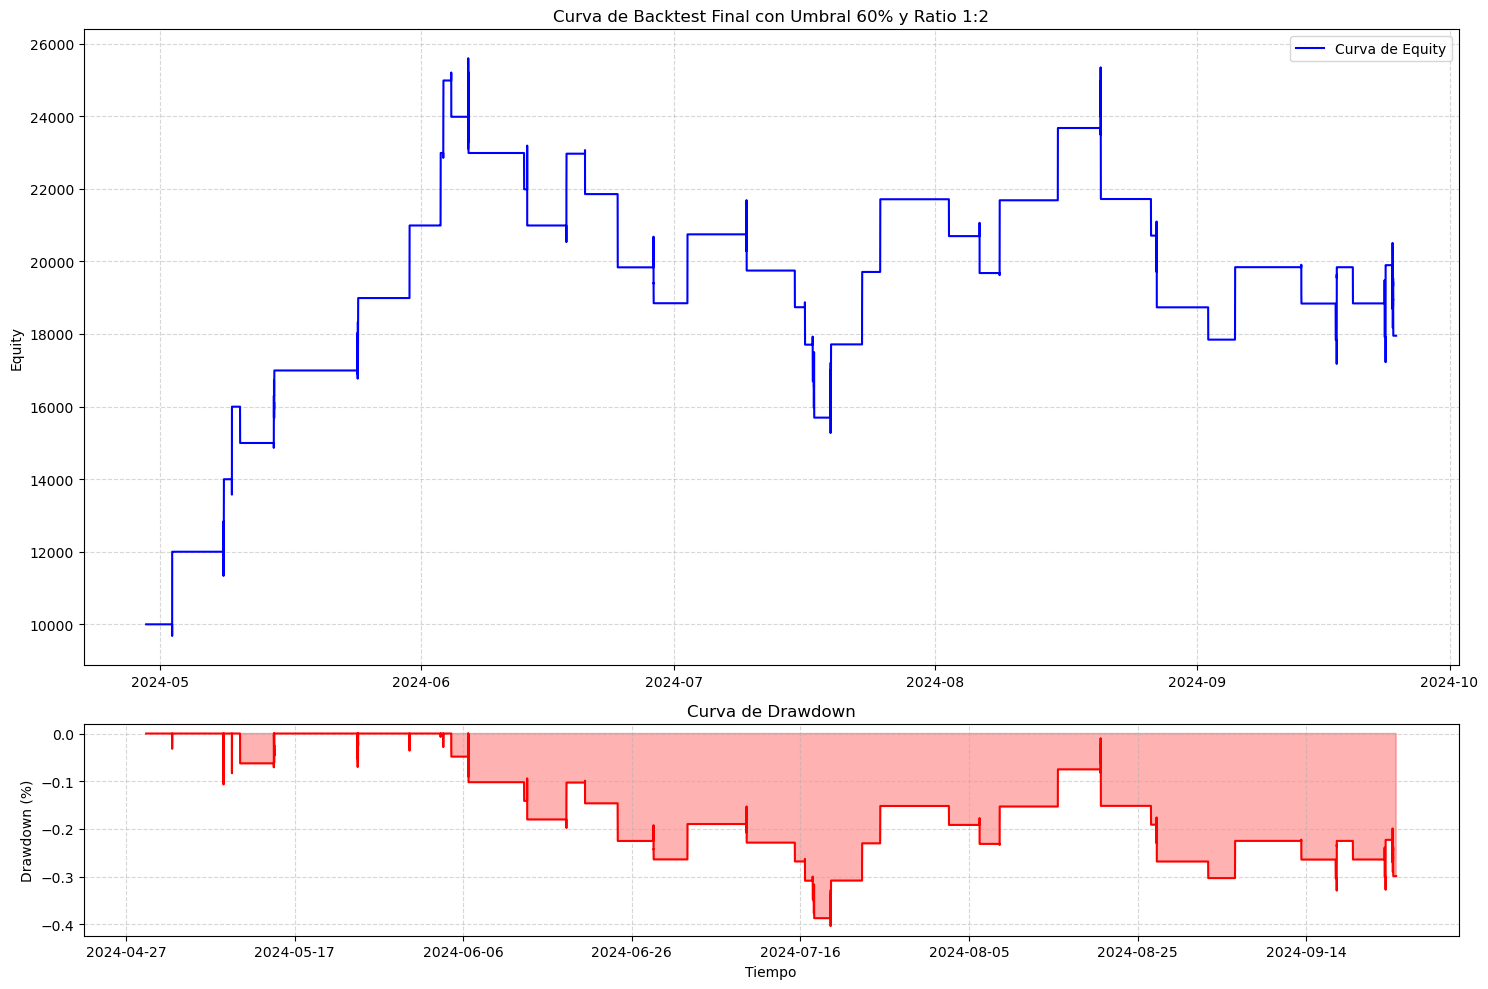

In [130]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Función para imprimir el número máximo de trades consecutivos ganadores y perdedores
def print_consecutive_trades(trades):
    """
    Calcula e imprime el número máximo de trades consecutivos ganadores y perdedores.

    Parámetros:
    - trades: DataFrame con la columna 'PnL' que representa las ganancias/pérdidas por trade.
    """
    # Determinar si cada trade es ganador o perdedor
    trades['is_winner'] = trades['PnL'] > 0

    # Identificar los cambios entre ganadores y perdedores para formar grupos
    trades['change'] = trades['is_winner'].ne(trades['is_winner'].shift()).cumsum()

    # Calcular la longitud de cada grupo de trades ganadores o perdedores consecutivos
    trades_grouped = trades.groupby(['change', 'is_winner']).size()

    # Obtener el número máximo de trades ganadores y perdedores consecutivos
    max_win_streak = trades_grouped[trades_grouped.index.get_level_values('is_winner')].max()
    max_loss_streak = trades_grouped[~trades_grouped.index.get_level_values('is_winner')].max()

    # Limpiar las columnas temporales
    trades.drop(columns=['is_winner', 'change'], inplace=True)

    print(f"Máximo de trades ganadores consecutivos: {max_win_streak}")
    print(f"Máximo de trades perdedores consecutivos: {max_loss_streak}")

# Función para graficar la curva de equity y drawdown
def plot_equity_and_drawdown(stats, title='Equity y Drawdown'):
    """
    Genera gráficos de la curva de equity y del drawdown basado en los resultados del backtest.

    Parámetros:
    - stats: resultados del backtest (stats_entrenamiento o stats_prueba).
    - title: título opcional para el gráfico.
    """
    # Obtener la curva de equity desde los resultados del backtest
    equity_curve = stats['_equity_curve']
    equity = equity_curve['Equity']

    # Calcular el valor máximo acumulado en cada punto (curva de equity máxima)
    max_equity = equity.cummax()

    # Calcular el drawdown en porcentaje
    drawdown = (equity - max_equity) / max_equity

    # Crear gráficos: equity y drawdown
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), gridspec_kw={'height_ratios': [3, 1]})

    # Gráfico de la curva de equity
    ax1.plot(equity.index, equity, label='Curva de Equity', color='blue')
    ax1.set_title(f'Curva de {title}')
    ax1.set_ylabel('Equity')
    ax1.grid(True, linestyle='--', alpha=0.5)
    ax1.legend()

    # Gráfico del drawdown en porcentaje
    ax2.plot(equity.index, drawdown, label='Drawdown', color='red')
    ax2.fill_between(equity.index, 0, drawdown, where=(drawdown < 0), color='red', alpha=0.3)
    ax2.set_title('Curva de Drawdown')
    ax2.set_ylabel('Drawdown (%)')
    ax2.set_xlabel('Tiempo')
    ax2.grid(True, linestyle='--', alpha=0.5)

    # Ajustar los ticks del eje X para mostrar etiquetas más específicas si es necesario
    ax2.xaxis.set_major_locator(ticker.MaxNLocator(10))  # Ajusta a la cantidad deseada de ticks

    plt.tight_layout()
    plt.show()

# Obtener y mostrar métricas del nuevo backtest combinado
print("Métricas del Backtest Combinado (Umbral 60% y Ratio 1:2):")
trades_combined_2 = stats_combined_2['_trades']
print_consecutive_trades(trades_combined_2)

# Graficar la curva de equity y drawdown para el backtest combinado con el nuevo umbral y ratio
plot_equity_and_drawdown(stats_combined_2, title='Backtest Final con Umbral 60% y Ratio 1:2')


# Conclusiones

Los algoritmos de Machine Learning han mejorado significativamente la estrategia de trading original. A continuación, se destacan los principales logros:

## Identificación de Operaciones Ganadoras

- De las 68 operaciones ganadoras de la estrategia original, el modelo de ML, con un umbral de decisión del 50%, identificó correctamente 41.
- Esto demuestra una capacidad sólida para reconocer patrones favorables, capturando alrededor del 60% de las oportunidades rentables y alineándose con el objetivo de maximizar las ganancias.

## Reducción de Operaciones Perdedoras

- Uno de los mayores beneficios del modelo de ML ha sido la reducción de operaciones perdedoras.
- Mientras que la estrategia original tuvo 107 operaciones perdedoras, el modelo ML redujo este número a 46, filtrando con éxito 61 operaciones desfavorables.
- Este filtrado mejora la eficiencia de la estrategia al evitar señales de bajo rendimiento.

## Impacto en Drawdown y Retorno Final

- El drawdown máximo disminuyó de -38.18% a -12.00% con el modelo ML, y el retorno final mejoró de -38.06% a -4.66%.
- Estos cambios evidencian el impacto positivo del modelo en la preservación del capital y la estabilidad de la estrategia.

## Evaluación de Umbrales de Decisión

- Al aumentar el umbral de decisión al 60%, las estadísticas mejoran, aunque se reduce el número de operaciones.
- Optar por un umbral del 50% ofrece un buen equilibrio entre precisión y cantidad de trades, manteniendo el recall sin sacrificar el rendimiento.

## Optimización del Ratio Riesgo-Beneficio

- Al aplicar un ratio riesgo-beneficio de 1:2 en las operaciones filtradas (con umbral del 50% y 60%), el modelo logra un retorno positivo para el periodo de prueba, lo cual demuestra que selecciona operaciones de mayor calidad.
- Esto sugiere que, al aumentar el ratio de 1:1 a 1:2, la estrategia para este periodo se vuelve ganadora, indicando una posible optimización en la rentabilidad mediante un ajuste en la relación riesgo-recompensa.

## Backtest Final con Umbral del 60% y Ratio 1:2
- Para finalizar, se realizó un backtest adicional aplicando un umbral del 60% y un ratio riesgo-beneficio de 1:2. Dado el menor número de operaciones, se aumentó el riesgo por operación al 10% en lugar del 1%.
- Este ajuste muestra resultados positivos para el periodo, lo que indica que el modelo no solo es capaz de identificar operaciones de alta calidad, sino también de adaptarse a una estrategia más agresiva cuando se reduce el número de señales.

## Perspectiva a Futuro

- Los resultados confirman que aplicar Machine Learning a la estrategia de trading es una dirección prometedora.
- Con optimización adicional, es posible afinar aún más la selección de operaciones ganadoras y mejorar las métricas clave de la estrategia.
- Los próximos pasos incluirán probar otros modelos, como redes neuronales, y explorar diferentes enfoques de ML que capten patrones más complejos. Esto puede transformar la estrategia en un sistema cada vez más eficiente y rentable.

# Conclusión Final

El modelo de Machine Learning ha mejorado la estrategia original al seleccionar operaciones más seguras y reducir el riesgo, consolidando el uso de ML como una herramienta clave en el desarrollo de estrategias algorítmicas. Con mayor experimentación y ajuste, este enfoque tiene el potencial de convertirse en una solución robusta y rentable en el ámbito del trading algorítmico.


## Parte 2: Cálculos y Evaluaciones Detalladas

In [109]:
import pandas as pd
import joblib
import numpy as np

#Dataframe para el backtest
dataf_prueba = pd.read_csv(r"C:\Users\Roger Saavedra\Desktop\ML VS BACKTEST\RESULTADOS FINALES\dataf_prueba.csv",index_col=0, parse_dates=True)

# Dataframe para los modelos 
df_longs_prueba = pd.read_csv(r"C:\Users\Roger Saavedra\Desktop\ML VS BACKTEST\RESULTADOS FINALES\df_longs_prueba.csv",index_col=0, parse_dates=True)
df_shorts_prueba = pd.read_csv(r"C:\Users\Roger Saavedra\Desktop\ML VS BACKTEST\RESULTADOS FINALES\df_shorts_prueba.csv",index_col=0, parse_dates=True)

# Modelos
modelo_rf_longs = joblib.load('modelo_rf_longs.pkl')
modelo_rf_shorts = joblib.load('modelo_rf_shorts.pkl')

dataf_prueba

,Open,High,Low,Close,Volume,ohlc_avg,EMA70,EMA250,RSI8
time,,,,,,,,,
2024-04-29 09:10:00,2339.380,2339.455,2339.030,2339.040,136,2339.22625,2337.780642,2334.036114,69.798570
2024-04-29 09:11:00,2339.040,2339.195,2338.985,2339.185,143,2339.10125,2337.817843,2334.076473,66.029232
2024-04-29 09:12:00,2339.185,2339.290,2339.035,2339.180,133,2339.17250,2337.856002,2334.117079,67.183682
2024-04-29 09:13:00,2339.180,2339.385,2338.300,2338.355,175,2338.80500,2337.882734,2334.154433,55.971263
2024-04-29 09:14:00,2338.355,2338.625,2338.270,2338.340,162,2338.39750,2337.897235,2334.188243,46.200204
...,...,...,...,...,...,...,...,...,...
2024-09-24 15:55:00,2640.490,2644.790,2639.905,2644.200,458,2642.34625,2642.983635,2638.054299,51.338494
2024-09-24 15:56:00,2644.190,2644.205,2642.165,2643.040,335,2643.40000,2642.995363,2638.096894,62.514041
2024-09-24 15:57:00,2643.045,2643.325,2642.245,2642.480,272,2642.77375,2642.989121,2638.134160,54.078550


In [127]:
# Backtest Original periodo de prueba

from backtesting import Backtest, Strategy
from backtesting import set_bokeh_output

# Configurar Bokeh para mostrar gráficos fuera del notebook
set_bokeh_output(notebook=False)

# Definir el valor de un pip para XAUUSD
valor_pip = 0.01
margen_pips = 20  # Margen de 20 pips

# Función para detectar cruces hacia arriba (crossover)
def crossover(series, level):
    return series[-2] < level and series[-1] > level

# Función para detectar cruces hacia abajo (crossunder)
def crossunder(series, level):
    return series[-2] > level and series[-1] < level

# Función para validar si estamos en una tendencia alcista (largos)
def is_bullish_trend(ema_fast, ema_slow):
    return ema_fast > ema_slow

# Función para validar si estamos en una tendencia bajista (cortos)
def is_bearish_trend(ema_fast, ema_slow):
    return ema_fast < ema_slow

class EMARSIWithPipMarginStrategyCombined(Strategy):
    risk_reward_ratio = 1.0 # Riesgo beneficio 1:1 
    risk_amount = 100  # Riesgo fijo por operación

    def init(self):
        # Inicialización de las series del DataFrame 
        self.ema_fast = self.I(lambda: self.data['EMA70'])  # EMA rápida 
        self.ema_slow = self.I(lambda: self.data['EMA250'])  # EMA lenta 
        self.rsi = self.I(lambda: self.data['RSI8']) 
        
        # Variables para resetear señales
        self.rsi_below_10 = False  # Para manejar las señales de compra (largos)
        self.rsi_above_90 = False  # Para manejar las señales de venta (cortos)

    def is_within_no_trade_zone(self):
        # Obtener la hora actual del índice de datos
        current_time = self.data.index[-1]
        hour = current_time.hour
        minute = current_time.minute

        # Solo identificar si estamos en las últimas 30 velas (30 minutos) antes del cierre de la sesión de Nueva York
        if (hour == 15 and minute >= 30):  # 30 minutos antes de las 16:00 UTC (fin de sesión NY)
            return True
        return False

    def next(self):
        # Verificar si estamos dentro de la ventana de no operación
        if self.is_within_no_trade_zone():
            return  # No abrir operación

        # Verificar si ya hay una posición abierta
        if self.position:
            return  # No abrir una nueva operación si ya hay una posición abierta

        # Obtener los valores correspondientes de la barra actual
        ema_fast = self.ema_fast[-1]
        ema_slow = self.ema_slow[-1]

        ### Lógica de compra (largos)
        if is_bullish_trend(ema_fast, ema_slow):
            # Detectamos el cruce hacia abajo del nivel 10 del RSI (crossunder)
            if crossunder(self.rsi, 10) and not self.rsi_below_10:
                self.rsi_below_10 = True  # Marcamos que el RSI ha cruzado hacia abajo
            
            # Luego detectamos el cruce hacia arriba del nivel 10 (crossover) después de haber cruzado hacia abajo
            if self.rsi_below_10 and crossover(self.rsi, 10):
                sl = self.data.Low[-5:].min() - (margen_pips * valor_pip)
                tp = self.data.Close[-1] + (self.data.Close[-1] - sl) * self.risk_reward_ratio
                
                risk_per_unit = self.data.Close[-1] - sl
                
                if risk_per_unit > 0:
                    size = self.risk_amount / risk_per_unit
                    size = max(1, int(size))  # Aseguramos que el tamaño mínimo sea 1
                    self.buy(size=size, sl=sl, tp=tp)
                
                self.rsi_below_10 = False  # Reiniciamos la señal para el siguiente ciclo

        ### Lógica de venta (cortos)
        if is_bearish_trend(ema_fast, ema_slow):
            # Detectamos el cruce hacia arriba del nivel 90 del RSI (crossover)
            if crossover(self.rsi, 90) and not self.rsi_above_90:
                self.rsi_above_90 = True  # Marcamos que el RSI ha cruzado hacia arriba
            
            # Luego detectamos el cruce hacia abajo del nivel 90 (crossunder) después de haber cruzado hacia arriba
            if self.rsi_above_90 and crossunder(self.rsi, 90):
                sl = self.data.High[-5:].max() + (margen_pips * valor_pip)
                tp = self.data.Close[-1] - (sl - self.data.Close[-1]) * self.risk_reward_ratio
                
                risk_per_unit = sl - self.data.Close[-1]
                
                if risk_per_unit > 0:
                    size = self.risk_amount / risk_per_unit
                    size = max(1, int(size))  # Aseguramos que el tamaño mínimo sea 1
                    self.sell(size=size, sl=sl, tp=tp)
                
                self.rsi_above_90 = False  # Reiniciamos la señal para el siguiente ciclo
                
# Ejecutar el backtest para el entrenamiento y la prueba
bt_prueba = Backtest(dataf_prueba, EMARSIWithPipMarginStrategyCombined, cash=10000, margin=1/10000, commission=.000)
stats_prueba = bt_prueba.run()
stats_prueba



Start                     2024-04-29 09:10:00
End                       2024-09-24 15:59:00
Duration                    148 days 06:49:00
Exposure Time [%]                    2.067455
Equity Final [$]                      6193.69
Equity Peak [$]                      10020.37
Return [%]                           -38.0631
Buy & Hold Return [%]               13.004694
Return (Ann.) [%]                  -66.070616
Volatility (Ann.) [%]                8.638964
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -38.189009
Avg. Drawdown [%]                  -38.189009
Max. Drawdown Duration      148 days 04:13:00
Avg. Drawdown Duration      148 days 04:13:00
# Trades                                  175
Win Rate [%]                        38.857143
Best Trade [%]                       0.260238
Worst Trade [%]                      -0.22381
Avg. Trade [%]                    

Métricas del Backtest de Prueba:
Máximo de trades ganadores consecutivos: 7
Máximo de trades perdedores consecutivos: 9


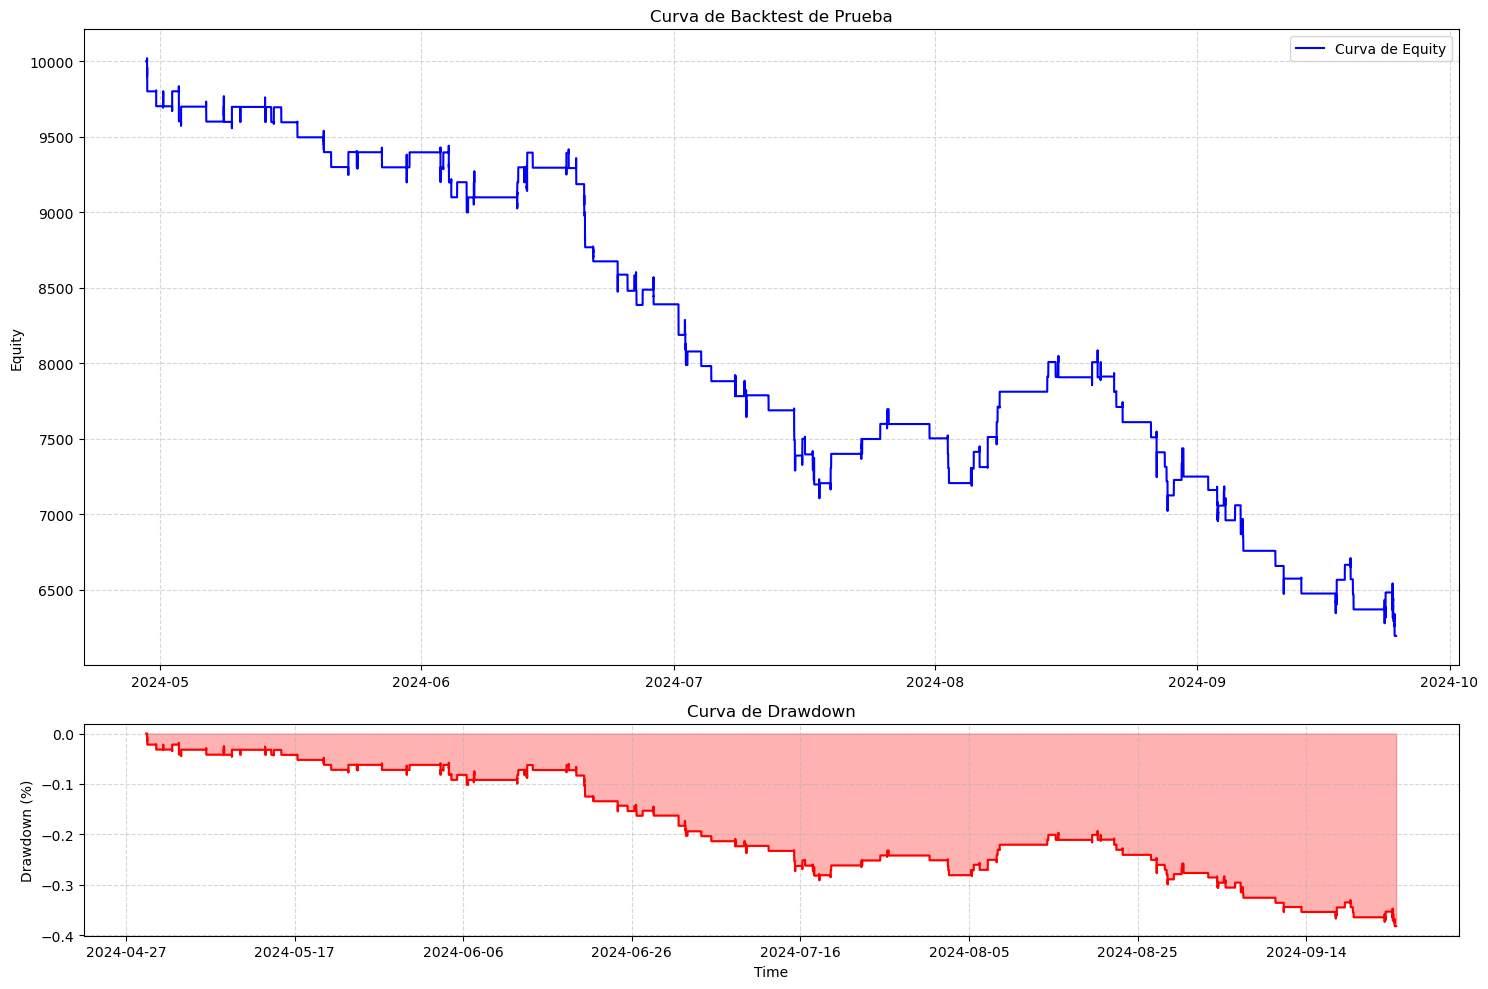

In [128]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Función para imprimir el número máximo de trades consecutivos ganadores y perdedores
def print_consecutive_trades(trades):
    # Determinar si cada trade es ganador o perdedor
    trades['is_winner'] = trades['PnL'] > 0

    # Identificar los cambios entre ganadores y perdedores para formar grupos
    trades['change'] = trades['is_winner'].ne(trades['is_winner'].shift()).cumsum()

    # Calcular la longitud de cada grupo de trades ganadores o perdedores consecutivos
    trades_grouped = trades.groupby(['change', 'is_winner']).size()

    # Obtener el número máximo de trades ganadores y perdedores consecutivos
    max_win_streak = trades_grouped[trades_grouped.index.get_level_values('is_winner')].max()
    max_loss_streak = trades_grouped[~trades_grouped.index.get_level_values('is_winner')].max()

    # Limpiar las columnas temporales
    trades.drop(columns=['is_winner', 'change'], inplace=True)

    print(f"Máximo de trades ganadores consecutivos: {max_win_streak}")
    print(f"Máximo de trades perdedores consecutivos: {max_loss_streak}")

# Función para graficar la curva de equity y drawdown
def plot_equity_and_drawdown(stats, title='Equity y Drawdown'):

    # Obtener la curva de equity desde los resultados del backtest
    equity_curve = stats['_equity_curve']
    equity = equity_curve['Equity']

    # Calcular el valor máximo acumulado en cada punto (curva de equity máxima)
    max_equity = equity.cummax()

    # Calcular el drawdown en porcentaje
    drawdown = (equity - max_equity) / max_equity

    # Crear gráficos: equity y drawdown
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), gridspec_kw={'height_ratios': [3, 1]})

    # Gráfico de la curva de equity
    ax1.plot(equity.index, equity, label='Curva de Equity', color='blue')
    ax1.set_title(f'Curva de {title}')
    ax1.set_ylabel('Equity')
    ax1.grid(True, linestyle='--', alpha=0.5)
    ax1.legend()

    # Gráfico del drawdown en porcentaje
    ax2.plot(equity.index, drawdown, label='Drawdown', color='red')
    ax2.fill_between(equity.index, 0, drawdown, where=(drawdown < 0), color='red', alpha=0.3)
    ax2.set_title('Curva de Drawdown')
    ax2.set_ylabel('Drawdown (%)')
    ax2.set_xlabel('Time')
    ax2.grid(True, linestyle='--', alpha=0.5)

    # Ajustar los ticks del eje X para mostrar etiquetas más específicas si es necesario
    ax2.xaxis.set_major_locator(ticker.MaxNLocator(10))  # Ajusta a la cantidad deseada de ticks

    plt.tight_layout()
    plt.show()

# Obtener y mostrar métricas del backtest de prueba
print("Métricas del Backtest de Prueba:")
trades_prueba = stats_prueba['_trades']
print_consecutive_trades(trades_prueba)

# Graficar la curva de equity y drawdown para el backtest de prueba
plot_equity_and_drawdown(stats_prueba, title='Backtest de Prueba')


In [112]:
# Backtest de operaciones largas

# Definir el valor de un pip para XAUUSD
valor_pip = 0.01
margen_pips = 20  # Margen de 20 pips

# Función para detectar cruces hacia arriba (crossover)
def crossover(series, level):
    return series[-2] < level and series[-1] > level

# Función para detectar cruces hacia abajo (crossunder)
def crossunder(series, level):
    return series[-2] > level and series[-1] < level

# Función para validar si estamos en una tendencia alcista
def is_bullish_trend(ema_fast, ema_slow):
    return ema_fast > ema_slow

class EMARSIWithPipMarginStrategyLong(Strategy):
    risk_reward_ratio = 1.0
    risk_amount = 100  # con 5% de riesgo por operación

    def init(self):
        # Inicialización de las series del DataFrame 
        self.ema_fast = self.I(lambda: self.data['EMA70'])  # EMA rápida 
        self.ema_slow = self.I(lambda: self.data['EMA250'])  # EMA lenta 
        self.rsi = self.I(lambda: self.data['RSI8']) 
        
        # Variable para resetear señales
        self.rsi_below_10 = False  # Para manejar las señales de compra

    def is_within_no_trade_zone(self):
        # Obtener la hora actual del índice de datos
        current_time = self.data.index[-1]
        hour = current_time.hour
        minute = current_time.minute

        # Solo identificar si estamos en las últimas 30 velas (30 minutos) antes del cierre de la sesión de Nueva York
        if (hour == 15 and minute >= 30):  # 30 minutos antes de las 16:00 UTC (fin de sesión NY)
            return True
        return False
          
    def next(self):
        # Verificar si estamos dentro de la ventana de no operación (10 velas antes del cierre)
        if self.is_within_no_trade_zone():
            return  # No abrir operación

        # Verificar si ya hay una posición abierta
        if self.position:
            return  # No abrir una nueva operación si ya hay una posición abierta

        # Obtener los valores correspondientes de la barra actual
        ema_fast = self.ema_fast[-1]
        ema_slow = self.ema_slow[-1]
        
        ### Lógica de compra (largos)
        if is_bullish_trend(ema_fast, ema_slow):
            # Detectamos el cruce hacia abajo del nivel 10 del RSI (crossunder)
            if crossunder(self.rsi, 10) and not self.rsi_below_10:
                self.rsi_below_10 = True  # Marcamos que el RSI ha cruzado hacia abajo
            
            # Luego detectamos el cruce hacia arriba del nivel 10 (crossover) después de haber cruzado hacia abajo
            if self.rsi_below_10 and crossover(self.rsi, 10):
                sl = self.data.Low[-5:].min() - (margen_pips * valor_pip)
                tp = self.data.Close[-1] + (self.data.Close[-1] - sl) * self.risk_reward_ratio
                
                risk_per_unit = self.data.Close[-1] - sl
                
                if risk_per_unit > 0:
                    size = self.risk_amount / risk_per_unit
                    size = max(1, int(size))  # Aseguramos que el tamaño mínimo sea 1
                    self.buy(size=size, sl=sl, tp=tp)
                
                self.rsi_below_10 = False  # Reiniciamos la señal para el siguiente ciclo

bt_prueba_longs = Backtest(dataf_prueba, EMARSIWithPipMarginStrategyLong, cash=10000, margin=1/10000, commission=.000)
stats_prueba_longs = bt_prueba_longs.run()

# Backtest de operaciones cortas

# Definir el valor de un pip para XAUUSD
valor_pip = 0.01
margen_pips = 20  # Margen de 20 pips

# Función para detectar cruces hacia arriba (crossover)
def crossover(series, level):
    return series[-2] < level and series[-1] > level

# Función para detectar cruces hacia abajo (crossunder)
def crossunder(series, level):
    return series[-2] > level and series[-1] < level

# Función para validar si estamos en una tendencia bajista
def is_bearish_trend(ema_fast, ema_slow):
    return ema_fast < ema_slow

class EMARSIWithPipMarginStrategyShort(Strategy):
    risk_reward_ratio = 1.0
    risk_amount = 100  # con 5% de riesgo por operación, llega a un 97% de dd con un return del 52%

    def init(self):
        # Inicialización de las series del DataFrame 
        self.ema_fast = self.I(lambda: self.data['EMA70'])  # EMA rápida 
        self.ema_slow = self.I(lambda: self.data['EMA250'])  # EMA lenta 
        self.rsi = self.I(lambda: self.data['RSI8']) 
        
        # Variable para resetear señales
        self.rsi_above_90 = False  # Para manejar las señales de venta

    def is_within_no_trade_zone(self):
        # Obtener la hora actual del índice de datos
        current_time = self.data.index[-1]
        hour = current_time.hour
        minute = current_time.minute

        # Solo identificar si estamos en las últimas 30 velas (30 minutos) antes del cierre de la sesión de Nueva York
        if (hour == 15 and minute >= 30):  # 30 minutos antes de las 16:00 UTC (fin de sesión NY)
            return True
        return False
          
    def next(self):
        # Verificar si estamos dentro de la ventana de no operación (10 velas antes del cierre)
        if self.is_within_no_trade_zone():
            return  # No abrir operación

        # Verificar si ya hay una posición abierta
        if self.position:
            return  # No abrir una nueva operación si ya hay una posición abierta

        # Obtener los valores correspondientes de la barra actual
        ema_fast = self.ema_fast[-1]
        ema_slow = self.ema_slow[-1]
        
        ### Lógica de venta (cortos)
        if is_bearish_trend(ema_fast, ema_slow):
            # Detectamos el cruce hacia arriba del nivel 90 del RSI (crossover)
            if crossover(self.rsi, 90) and not self.rsi_above_90:
                self.rsi_above_90 = True  # Marcamos que el RSI ha cruzado hacia arriba
            
            # Luego detectamos el cruce hacia abajo del nivel 90 (crossunder) después de haber cruzado hacia arriba
            if self.rsi_above_90 and crossunder(self.rsi, 90):
                sl = self.data.High[-5:].max() + (margen_pips * valor_pip)
                tp = self.data.Close[-1] - (sl - self.data.Close[-1]) * self.risk_reward_ratio
                
                risk_per_unit = sl - self.data.Close[-1]
                
                if risk_per_unit > 0:
                    size = self.risk_amount / risk_per_unit
                    size = max(1, int(size))  # Aseguramos que el tamaño mínimo sea 1
                    self.sell(size=size, sl=sl, tp=tp)
                
                self.rsi_above_90 = False  # Reiniciamos la señal para el siguiente ciclo

bt_prueba_shorts = Backtest(dataf_prueba, EMARSIWithPipMarginStrategyShort, cash=10000, margin=1/10000, commission=.000)
stats_prueba_shorts = bt_prueba_shorts.run()

from IPython.display import display, HTML


display(HTML(f"""
<div style="display: flex;">
    <div style="width: 50%; padding-right: 10px;">
        <h3>Backtest Prueba Largos</h3>
        <pre>{stats_prueba_longs}</pre>
    </div>
    <div style="width: 50%; padding-left: 10px;">
        <h3>Backtest Prueba Cortos</h3>
        <pre>{stats_prueba_shorts}</pre>
    </div>
</div>
"""))



# Estos son todos los datos a mejorar para eso vamos a aplicar los modelos entrenados separados y uniremos toda la informacion

In [113]:
# Preparar final de los datos para el modelado

columns_to_drop_longs = ['EntryPrice', 'ExitPrice', 'PnL', 'EntryTime', 'ExitTime', 'Duration', 'result',
                         'RSI8', 'EMA70', 'EMA250']

columns_to_drop_shorts = [
    'EntryPrice', 'ExitPrice', 'PnL', 'EntryTime', 'ExitTime', 'Duration', 'result',
    'volatility_14_median_3', 'ema_diff', 'EMA_ratio_std_3', 'ema_diff_slope_5',
    'body_size_perc', 'perc_var_open_close_mean_3', 'candle_range_perc_median_3',
    'Volume_median_3', 'ema_diff_min_3', 'volatility_14', 'risk_adjusted_return_5',
    'rsi_volatility_ratio', 'perc_var_open_close', 'close_to_ema250',
    'volatility_14_min_3', 'EMA70_slope_5', 'EMA250_slope_5', 'EMA250',
    'EMA70_std_3', 'close_to_ema250_mean_3', 'Volume_mean_3', 'volatility_14_mean_3',
    'close_to_ema250_std_3', 'Volume_max_3', 'volatility_14_max_3', 'EMA70',
    'RSI8_25%_3', 'EMA_ratio_mean_3', 'rsi_volatility_ratio_min_3', 'Low',
    'close_to_ema70_mean_3', 'atr_14_max_3', 'return_5', 'atr_14', 'obv_mean_3',
    'rsi_volatility_ratio_mean_3', 'rsi_volatility_ratio_max_3', 'EMA70_min_3',
    'atr_14_min_3', 'ema_diff_mean_3', 'atr_14_mean_3', 'atr_14_median_3', 'High',
    'ema_diff_median_3', 'rsi_volatility_ratio_median_3', 'Close', 'ohlc_avg',
    'EMA70_mean_3', 'EMA70_max_3', 'EMA70_median_3', 'EMA250_mean_3', 
    'EMA250_min_3', 'EMA250_max_3', 'EMA250_median_3', 'ema_diff_max_3'
]

# Crear X e y para el conjunto de prueba 
X_prueba_longs = df_longs_prueba.drop(columns=columns_to_drop_longs)
y_prueba_longs = df_longs_prueba['result']

X_prueba_shorts = df_shorts_prueba.drop(columns=columns_to_drop_shorts)
y_prueba_shorts = df_shorts_prueba['result']



In [114]:
dfr = dataf_prueba.copy()
# Obtener las predicciones de probabilidad del modelo optimizado
y_pred_proba_longs = modelo_rf_longs.predict_proba(X_prueba_longs)[:, 1]  # Probabilidad de clase positiva

# Usar un umbral de 0.55 para decidir si es una señal positiva (1) o no (0)
threshold = 0.50
y_pred_longs = np.where(y_pred_proba_longs >= threshold, 1, 0)  # Si probabilidad >= 0.55, asignar 1, sino 0
    
# Vamos a crear una nueva columna en 'dataf' que inicialmente estará llena de ceros
dfr['predicciones_modelo_rf_longs'] = 0
    
# Solo actualizar las filas de 'dataf' cuyos índices coinciden con los índices de 'X'
dfr.loc[X_prueba_longs.index, 'predicciones_modelo_rf_longs'] = y_pred_longs
    
num_trades = dfr['predicciones_modelo_rf_longs'].sum()
print(f"Número total de trades identificados por el modelo: {num_trades}")

dfr

Número total de trades identificados por el modelo: 47


,Open,High,Low,Close,Volume,ohlc_avg,EMA70,EMA250,RSI8,predicciones_modelo_rf_longs
time,,,,,,,,,,
2024-04-29 09:10:00,2339.380,2339.455,2339.030,2339.040,136,2339.22625,2337.780642,2334.036114,69.798570,0
2024-04-29 09:11:00,2339.040,2339.195,2338.985,2339.185,143,2339.10125,2337.817843,2334.076473,66.029232,0
2024-04-29 09:12:00,2339.185,2339.290,2339.035,2339.180,133,2339.17250,2337.856002,2334.117079,67.183682,0
2024-04-29 09:13:00,2339.180,2339.385,2338.300,2338.355,175,2338.80500,2337.882734,2334.154433,55.971263,0
2024-04-29 09:14:00,2338.355,2338.625,2338.270,2338.340,162,2338.39750,2337.897235,2334.188243,46.200204,0
...,...,...,...,...,...,...,...,...,...,...
2024-09-24 15:55:00,2640.490,2644.790,2639.905,2644.200,458,2642.34625,2642.983635,2638.054299,51.338494,0
2024-09-24 15:56:00,2644.190,2644.205,2642.165,2643.040,335,2643.40000,2642.995363,2638.096894,62.514041,0
2024-09-24 15:57:00,2643.045,2643.325,2642.245,2642.480,272,2642.77375,2642.989121,2638.134160,54.078550,0


In [115]:
from backtesting import Backtest, Strategy

# Definir el valor de un pip para XAUUSD
valor_pip = 0.01
margen_pips = 20  # Margen de 20 pips

class SignalBasedStrategyLong(Strategy):
    risk_reward_ratio = 1.0
    risk_amount = 100  # Riesgo fijo por operación en dólares
    
    def init(self):
        # Llamamos a las series del DataFrame 
        self.signals = self.I(lambda: self.data['predicciones_modelo_rf_longs'])  # Señales de compra/venta
    
    def next(self):
        # Si ya hay una posición abierta, no abrir una nueva
        if self.position:
            return  # Evita abrir otra posición mientras hay una en curso
        
        # Lógica de compra (señal = 1)
        if self.signals[-1] == 1:
            # Definir el stop loss basado en el mínimo de las últimas 5 velas
            sl = self.data.Low[-5:].min() - (margen_pips * valor_pip)
            # Definir el take profit basado en el ratio riesgo/beneficio
            tp = self.data.Close[-1] + (self.data.Close[-1] - sl) * self.risk_reward_ratio
            # Calcular el riesgo por unidad
            risk_per_unit = self.data.Close[-1] - sl
            
            # Verificar si el riesgo por unidad es positivo
            if risk_per_unit > 0:
                # Calcular el tamaño de la posición basado en el riesgo fijo
                size = self.risk_amount / risk_per_unit
                # Asegurar que el tamaño de la posición sea válido (mínimo 1)
                size = max(1, int(size))
                # Abrir una posición de compra
                self.buy(size=size, sl=sl, tp=tp)

# Ejecutar el backtest
bt = Backtest(dfr, SignalBasedStrategyLong, cash=10000, margin=1/10000, commission=.000)
stats = bt.run()
print(stats)


Start                     2024-04-29 09:10:00
End                       2024-09-24 15:59:00
Duration                    148 days 06:49:00
Exposure Time [%]                    0.675407
Equity Final [$]                       9529.6
Equity Peak [$]                     10255.705
Return [%]                             -4.704
Buy & Hold Return [%]               13.004694
Return (Ann.) [%]                   -8.601674
Volatility (Ann.) [%]                9.887882
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                   -8.475527
Avg. Drawdown [%]                   -1.266476
Max. Drawdown Duration       96 days 07:34:00
Avg. Drawdown Duration       10 days 20:55:00
# Trades                                   47
Win Rate [%]                        44.680851
Best Trade [%]                        0.24507
Worst Trade [%]                      -0.22381
Avg. Trade [%]                    

ROC AUC: 0.6880580357142858


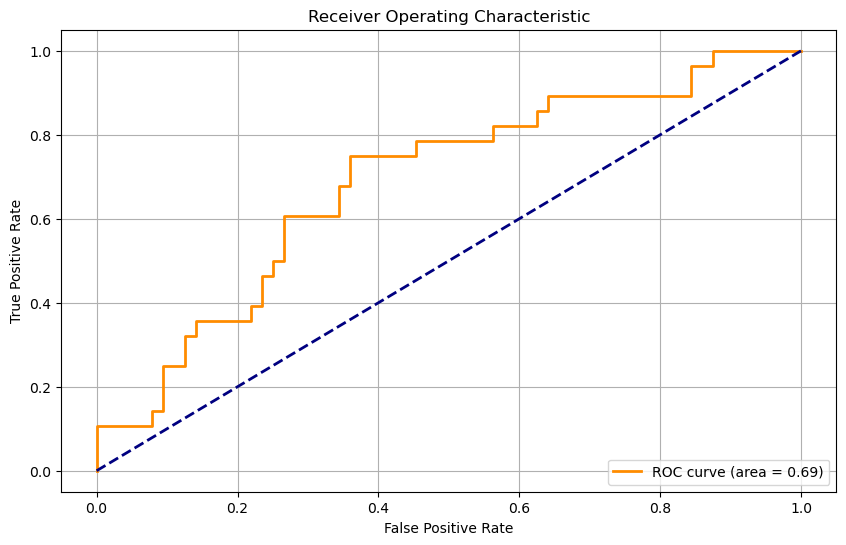

Classification Report for threshold = 0.2:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        64
           1       0.30      1.00      0.47        28

    accuracy                           0.30        92
   macro avg       0.15      0.50      0.23        92
weighted avg       0.09      0.30      0.14        92

Classification Report for threshold = 0.3:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        64
           1       0.30      1.00      0.47        28

    accuracy                           0.30        92
   macro avg       0.15      0.50      0.23        92
weighted avg       0.09      0.30      0.14        92

Classification Report for threshold = 0.4:
              precision    recall  f1-score   support

           0       1.00      0.11      0.20        64
           1       0.33      1.00      0.50        28

    accuracy                           0.38        92

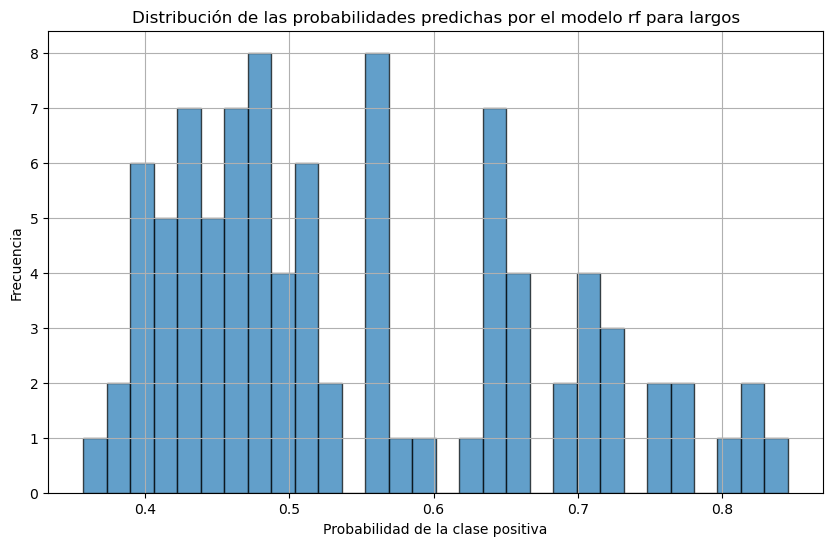

In [116]:
from sklearn.metrics import roc_auc_score, classification_report, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Calcular AUC ROC
roc_auc = roc_auc_score(y_prueba_longs, y_pred_proba_longs)
print("ROC AUC:", roc_auc)

# Curva ROC
fpr, tpr, roc_thresholds = roc_curve(y_prueba_longs, y_pred_proba_longs)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Calcular y mostrar la clasificación de informes para varios umbrales
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
for thresh in thresholds:
    y_pred_thresh = np.where(y_pred_proba_longs >= thresh, 1, 0)
    print(f"Classification Report for threshold = {thresh}:")
    print(classification_report(y_prueba_longs, y_pred_thresh, zero_division=0))

# Graficar las probabilidades predichas por el modelo
plt.figure(figsize=(10, 6))
plt.hist(y_pred_proba_longs, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribución de las probabilidades predichas por el modelo rf para largos')
plt.xlabel('Probabilidad de la clase positiva')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


In [117]:
# Obtener las predicciones de probabilidad del modelo optimizado
y_pred_proba_shorts = modelo_rf_shorts.predict_proba(X_prueba_shorts)[:, 1]  # Probabilidad de clase positiva

# Usar un umbral de 0.55 para decidir si es una señal positiva (1) o no (0)
threshold = 0.50
y_pred_shorts = np.where(y_pred_proba_shorts >= threshold, 1, 0)  # Si probabilidad >= 0.55, asignar 1, sino 0
    
# Vamos a crear una nueva columna en 'dataf' que inicialmente estará llena de ceros
dfr['predicciones_modelo_rf_shorts'] = 0
    
# Solo actualizar las filas de 'dataf' cuyos índices coinciden con los índices de 'X'
dfr.loc[X_prueba_shorts.index, 'predicciones_modelo_rf_shorts'] = y_pred_shorts
    
num_trades = dfr['predicciones_modelo_rf_shorts'].sum()
print(f"Número total de trades identificados por el modelo: {num_trades}")

dfr

Número total de trades identificados por el modelo: 40


,Open,High,Low,Close,Volume,ohlc_avg,EMA70,EMA250,RSI8,predicciones_modelo_rf_longs,predicciones_modelo_rf_shorts
time,,,,,,,,,,,
2024-04-29 09:10:00,2339.380,2339.455,2339.030,2339.040,136,2339.22625,2337.780642,2334.036114,69.798570,0,0
2024-04-29 09:11:00,2339.040,2339.195,2338.985,2339.185,143,2339.10125,2337.817843,2334.076473,66.029232,0,0
2024-04-29 09:12:00,2339.185,2339.290,2339.035,2339.180,133,2339.17250,2337.856002,2334.117079,67.183682,0,0
2024-04-29 09:13:00,2339.180,2339.385,2338.300,2338.355,175,2338.80500,2337.882734,2334.154433,55.971263,0,0
2024-04-29 09:14:00,2338.355,2338.625,2338.270,2338.340,162,2338.39750,2337.897235,2334.188243,46.200204,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2024-09-24 15:55:00,2640.490,2644.790,2639.905,2644.200,458,2642.34625,2642.983635,2638.054299,51.338494,0,0
2024-09-24 15:56:00,2644.190,2644.205,2642.165,2643.040,335,2643.40000,2642.995363,2638.096894,62.514041,0,0
2024-09-24 15:57:00,2643.045,2643.325,2642.245,2642.480,272,2642.77375,2642.989121,2638.134160,54.078550,0,0


In [118]:
from backtesting import Backtest, Strategy
import numpy as np

# Definir el valor de un pip para XAUUSD
valor_pip = 0.01
margen_pips = 20  # Margen de 20 pips

class SignalBasedStrategyShort(Strategy):
    risk_reward_ratio = 1.0
    risk_amount = 100  # Riesgo fijo por operación en dólares
    
    def init(self):
        # Llamamos a las series del DataFrame 
        self.signals = self.I(lambda: self.data['predicciones_modelo_rf_shorts'])  # Señales de compra/venta
    
    def next(self):
        # Si ya hay una posición abierta, no abrir una nueva
        if self.position:
            return  # Evita abrir otra posición mientras hay una en curso
        
        # Lógica de venta (señal = 1)
        if self.signals[-1] == 1:
            # Definir el stop loss basado en el máximo de las últimas 5 velas
            sl = self.data.High[-5:].max() + (margen_pips * valor_pip)
            # Definir el take profit basado en el ratio riesgo/beneficio
            tp = self.data.Close[-1] - (sl - self.data.Close[-1]) * self.risk_reward_ratio
            # Calcular el riesgo por unidad
            risk_per_unit = sl - self.data.Close[-1]
            
            # Verificar si el riesgo por unidad es positivo
            if risk_per_unit > 0:
                # Calcular el tamaño de la posición basado en el riesgo fijo
                size = self.risk_amount / risk_per_unit
                # Asegurar que el tamaño de la posición sea válido (mínimo 1)
                size = max(1, int(size))
                # Abrir una posición de venta
                self.sell(size=size, sl=sl, tp=tp)

# Ejecutar el backtest
bt = Backtest(dfr, SignalBasedStrategyShort, cash=10000, margin=1/10000, commission=.000)
stats = bt.run()
print(stats)


Start                     2024-04-29 09:10:00
End                       2024-09-24 15:59:00
Duration                    148 days 06:49:00
Exposure Time [%]                     0.37965
Equity Final [$]                    10004.005
Equity Peak [$]                       10479.4
Return [%]                            0.04005
Buy & Hold Return [%]               13.004694
Return (Ann.) [%]                    0.094349
Volatility (Ann.) [%]                9.885396
Sharpe Ratio                         0.009544
Sortino Ratio                        0.013066
Calmar Ratio                         0.015389
Max. Drawdown [%]                   -6.130933
Avg. Drawdown [%]                   -2.751941
Max. Drawdown Duration       54 days 20:05:00
Avg. Drawdown Duration       19 days 14:56:00
# Trades                                   40
Win Rate [%]                             50.0
Best Trade [%]                       0.134578
Worst Trade [%]                     -0.080143
Avg. Trade [%]                    

ROC AUC: 0.5343023255813953


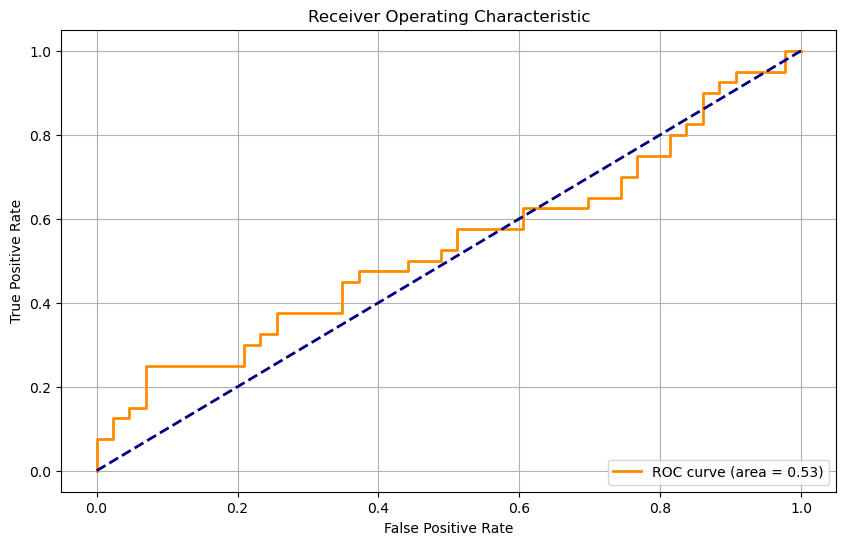

Classification Report for threshold = 0.2:
              precision    recall  f1-score   support

           0       1.00      0.02      0.05        43
           1       0.49      1.00      0.66        40

    accuracy                           0.49        83
   macro avg       0.74      0.51      0.35        83
weighted avg       0.75      0.49      0.34        83

Classification Report for threshold = 0.3:
              precision    recall  f1-score   support

           0       0.50      0.05      0.09        43
           1       0.48      0.95      0.64        40

    accuracy                           0.48        83
   macro avg       0.49      0.50      0.36        83
weighted avg       0.49      0.48      0.35        83

Classification Report for threshold = 0.4:
              precision    recall  f1-score   support

           0       0.47      0.19      0.27        43
           1       0.47      0.78      0.58        40

    accuracy                           0.47        83

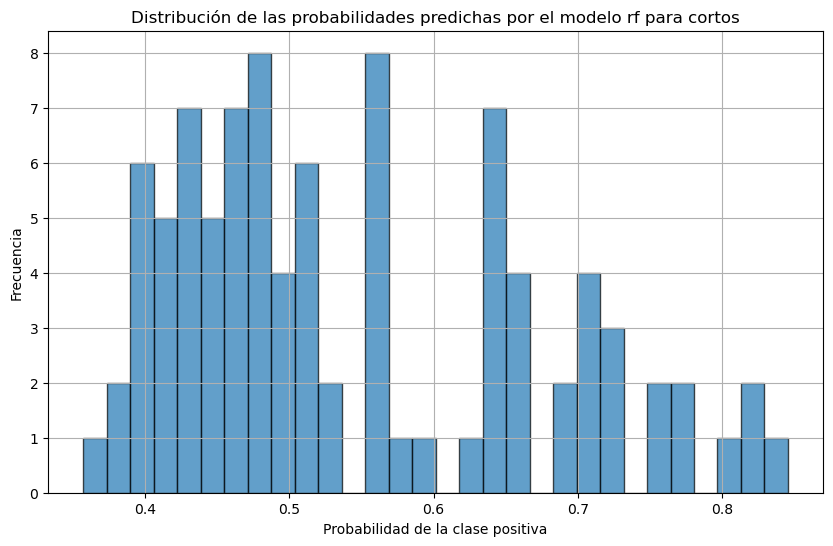

In [119]:
from sklearn.metrics import roc_auc_score, classification_report, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Calcular AUC ROC
roc_auc = roc_auc_score(y_prueba_shorts, y_pred_proba_shorts)
print("ROC AUC:", roc_auc)

# Curva ROC
fpr, tpr, roc_thresholds = roc_curve(y_prueba_shorts, y_pred_proba_shorts)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Calcular y mostrar la clasificación de informes para varios umbrales
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
for thresh in thresholds:
    y_pred_thresh = np.where(y_pred_proba_shorts >= thresh, 1, 0)
    print(f"Classification Report for threshold = {thresh}:")
    print(classification_report(y_prueba_shorts, y_pred_thresh, zero_division=0))

# Graficar las probabilidades predichas por el modelo
plt.figure(figsize=(10, 6))
plt.hist(y_pred_proba_longs, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribución de las probabilidades predichas por el modelo rf para cortos')
plt.xlabel('Probabilidad de la clase positiva')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


In [120]:
from backtesting import Backtest, Strategy

# Definir el valor de un pip para XAUUSD
valor_pip = 0.01
margen_pips = 20  # Margen de 20 pips

class SignalBasedStrategyCombined(Strategy):
    risk_reward_ratio = 1
    risk_amount = 100  # Riesgo fijo por operación en dólares
    
    def init(self):
        # Llamamos a las series del DataFrame 
        self.signals_long = self.I(lambda: self.data['predicciones_modelo_rf_longs'])  # Señales de compra (largos)
        self.signals_short = self.I(lambda: self.data['predicciones_modelo_rf_shorts'])  # Señales de venta (cortos)
    
    def next(self):
        # Si ya hay una posición abierta, no abrir una nueva
        if self.position:
            return  # Evita abrir otra posición mientras hay una en curso
        
        # Lógica de compra (señal = 1 en largos)
        if self.signals_long[-1] == 1:
            sl = self.data.Low[-5:].min() - (margen_pips * valor_pip)  # Stop loss para largos
            tp = self.data.Close[-1] + (self.data.Close[-1] - sl) * self.risk_reward_ratio  # Take profit
            risk_per_unit = self.data.Close[-1] - sl
            
            if risk_per_unit > 0:
                size = self.risk_amount / risk_per_unit
                size = max(1, int(size))
                self.buy(size=size, sl=sl, tp=tp)  # Abrir una posición de compra
        
        # Lógica de venta (señal = 1 en cortos)
        elif self.signals_short[-1] == 1:
            sl = self.data.High[-5:].max() + (margen_pips * valor_pip)  # Stop loss para cortos
            tp = self.data.Close[-1] - (sl - self.data.Close[-1]) * self.risk_reward_ratio  # Take profit
            risk_per_unit = sl - self.data.Close[-1]
            
            if risk_per_unit > 0:
                size = self.risk_amount / risk_per_unit
                size = max(1, int(size))
                self.sell(size=size, sl=sl, tp=tp)  # Abrir una posición de venta

# Ejecutar el backtest con la estrategia combinada
bt_combined = Backtest(dfr, SignalBasedStrategyCombined, cash=10000, margin=1/10000, commission=.000)
stats_combined = bt_combined.run()
print(stats_combined)


Start                     2024-04-29 09:10:00
End                       2024-09-24 15:59:00
Duration                    148 days 06:49:00
Exposure Time [%]                    1.055056
Equity Final [$]                     9533.605
Equity Peak [$]                     10649.775
Return [%]                           -4.66395
Buy & Hold Return [%]               13.004694
Return (Ann.) [%]                   -8.511183
Volatility (Ann.) [%]               13.523655
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -12.001662
Avg. Drawdown [%]                   -2.378638
Max. Drawdown Duration       96 days 07:34:00
Avg. Drawdown Duration       13 days 10:02:00
# Trades                                   87
Win Rate [%]                        47.126437
Best Trade [%]                        0.24507
Worst Trade [%]                      -0.22381
Avg. Trade [%]                    

Métricas del Backtest Combinado:
Máximo de trades ganadores consecutivos: 5
Máximo de trades perdedores consecutivos: 10


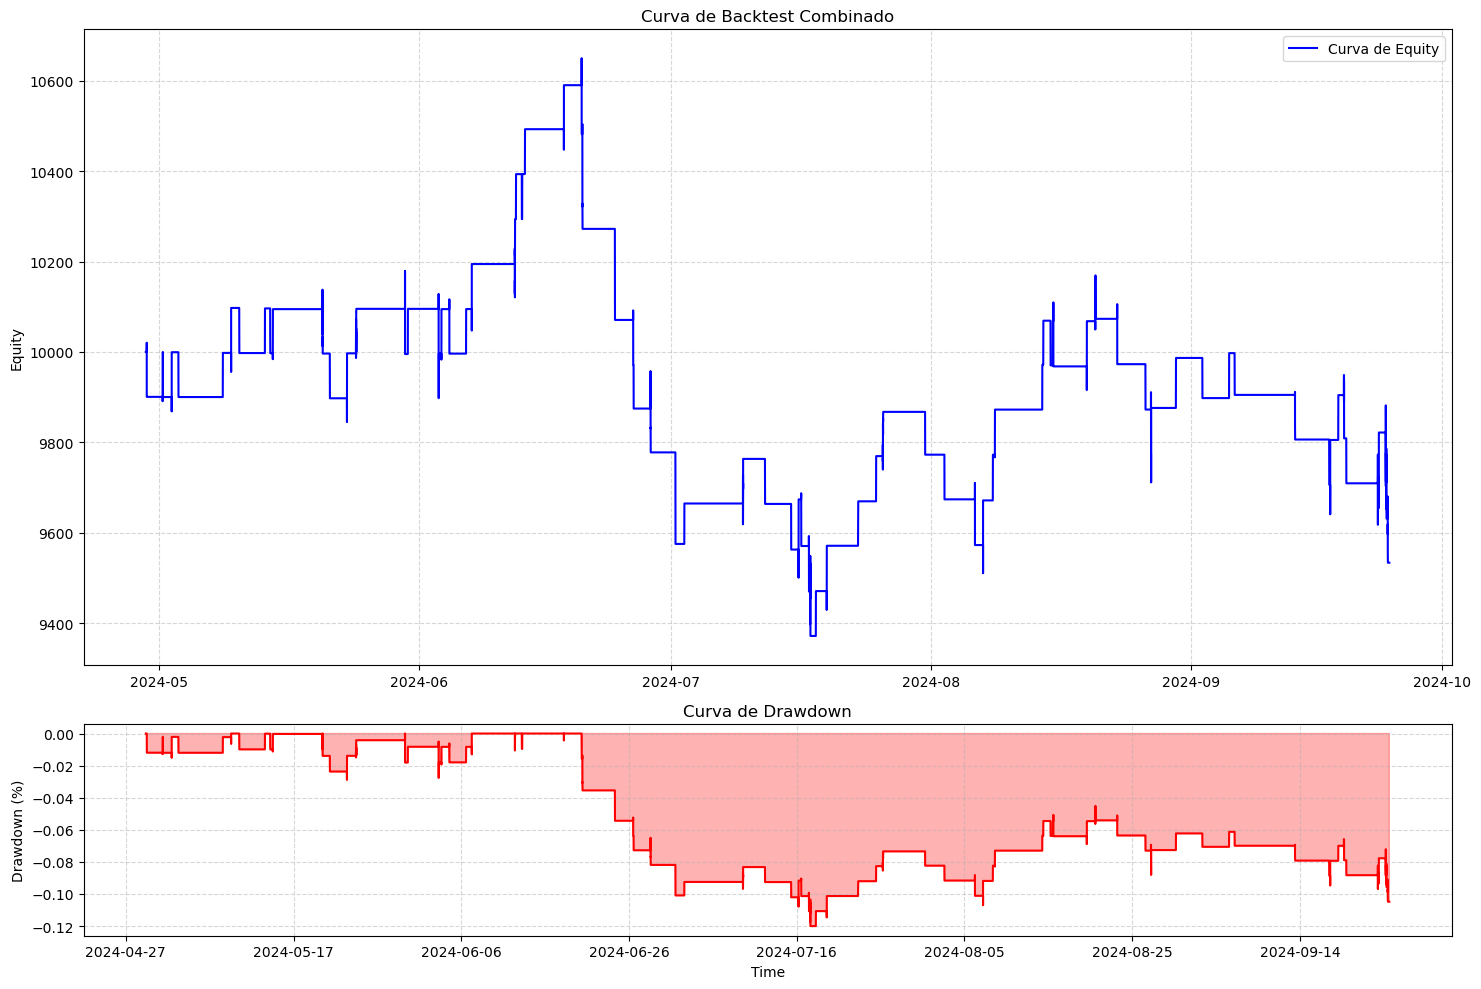

In [121]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Función para imprimir el número máximo de trades consecutivos ganadores y perdedores
def print_consecutive_trades(trades):
    """
    Calcula e imprime el número máximo de trades consecutivos ganadores y perdedores.

    Parámetros:
    - trades: DataFrame con la columna 'PnL' que representa las ganancias/perdidas por trade.
    """
    # Determinar si cada trade es ganador o perdedor
    trades['is_winner'] = trades['PnL'] > 0

    # Identificar los cambios entre ganadores y perdedores para formar grupos
    trades['change'] = trades['is_winner'].ne(trades['is_winner'].shift()).cumsum()

    # Calcular la longitud de cada grupo de trades ganadores o perdedores consecutivos
    trades_grouped = trades.groupby(['change', 'is_winner']).size()

    # Obtener el número máximo de trades ganadores y perdedores consecutivos
    max_win_streak = trades_grouped[trades_grouped.index.get_level_values('is_winner')].max()
    max_loss_streak = trades_grouped[~trades_grouped.index.get_level_values('is_winner')].max()

    # Limpiar las columnas temporales
    trades.drop(columns=['is_winner', 'change'], inplace=True)

    print(f"Máximo de trades ganadores consecutivos: {max_win_streak}")
    print(f"Máximo de trades perdedores consecutivos: {max_loss_streak}")

# Función para graficar la curva de equity y drawdown
def plot_equity_and_drawdown(stats, title='Equity y Drawdown'):
    """
    Genera gráficos de la curva de equity y del drawdown basado en los resultados del backtest.

    Parámetros:
    - stats: resultados del backtest (stats_entrenamiento o stats_prueba).
    - title: título opcional para el gráfico.
    """
    # Obtener la curva de equity desde los resultados del backtest
    equity_curve = stats['_equity_curve']
    equity = equity_curve['Equity']

    # Calcular el valor máximo acumulado en cada punto (curva de equity máxima)
    max_equity = equity.cummax()

    # Calcular el drawdown en porcentaje
    drawdown = (equity - max_equity) / max_equity

    # Crear gráficos: equity y drawdown
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), gridspec_kw={'height_ratios': [3, 1]})

    # Gráfico de la curva de equity
    ax1.plot(equity.index, equity, label='Curva de Equity', color='blue')
    ax1.set_title(f'Curva de {title}')
    ax1.set_ylabel('Equity')
    ax1.grid(True, linestyle='--', alpha=0.5)
    ax1.legend()

    # Gráfico del drawdown en porcentaje
    ax2.plot(equity.index, drawdown, label='Drawdown', color='red')
    ax2.fill_between(equity.index, 0, drawdown, where=(drawdown < 0), color='red', alpha=0.3)
    ax2.set_title('Curva de Drawdown')
    ax2.set_ylabel('Drawdown (%)')
    ax2.set_xlabel('Time')
    ax2.grid(True, linestyle='--', alpha=0.5)

    # Ajustar los ticks del eje X para mostrar etiquetas más específicas si es necesario
    ax2.xaxis.set_major_locator(ticker.MaxNLocator(10))  # Ajusta a la cantidad deseada de ticks

    plt.tight_layout()
    plt.show()

# Obtener y mostrar métricas del backtest combinado
print("Métricas del Backtest Combinado:")
trades_combined = stats_combined['_trades']
print_consecutive_trades(trades_combined)

# Graficar la curva de equity y drawdown para el backtest combinado
plot_equity_and_drawdown(stats_combined, title='Backtest Combinado')


# Backtest final 60% umbral, 1:2 ratio con 10% de riesgo

In [125]:
df_backtest_ml = dataf_prueba.copy()

# --- Modelo de Largos ---
# Obtener las predicciones de probabilidad del modelo optimizado
y_pred_proba_longs = modelo_rf_longs.predict_proba(X_prueba_longs)[:, 1]  # Probabilidad de clase positiva

# Usar un umbral de 0.60 para decidir si es una señal positiva (1) o no (0)
threshold = 0.60
y_pred_longs = np.where(y_pred_proba_longs >= threshold, 1, 0)  # Si probabilidad >= 0.60, asignar 1, sino 0

# Crear una columna en 'df_backtest_ml' para almacenar las predicciones de largos
df_backtest_ml['predicciones_modelo_rf_longs'] = 0
df_backtest_ml.loc[X_prueba_longs.index, 'predicciones_modelo_rf_longs'] = y_pred_longs

# Número total de trades de largos identificados
num_trades_longs = df_backtest_ml['predicciones_modelo_rf_longs'].sum()
print(f"Número total de trades de largos identificados por el modelo: {num_trades_longs}")


# --- Modelo de Cortos ---
# Obtener las predicciones de probabilidad del modelo optimizado
y_pred_proba_shorts = modelo_rf_shorts.predict_proba(X_prueba_shorts)[:, 1]  # Probabilidad de clase positiva

# Usar un umbral de 0.60 para decidir si es una señal positiva (1) o no (0)
y_pred_shorts = np.where(y_pred_proba_shorts >= threshold, 1, 0)  # Si probabilidad >= 0.60, asignar 1, sino 0

# Crear una columna en 'df_backtest_ml' para almacenar las predicciones de cortos
df_backtest_ml['predicciones_modelo_rf_shorts'] = 0
df_backtest_ml.loc[X_prueba_shorts.index, 'predicciones_modelo_rf_shorts'] = y_pred_shorts

# Número total de trades de cortos identificados
num_trades_shorts = df_backtest_ml['predicciones_modelo_rf_shorts'].sum()
print(f"Número total de trades de cortos identificados por el modelo: {num_trades_shorts}")


# --- Backtest con umbral del 60% y riesgo-beneficio de 1:2 ---
from backtesting import Backtest, Strategy

# Definir el valor de un pip para XAUUSD
valor_pip = 0.01
margen_pips = 20  # Margen de 20 pips

class SignalBasedStrategyCombined(Strategy):
    risk_reward_ratio = 2  # Ajuste a 1:2
    risk_amount = 1000  # Riesgo fijo por operación en dólares
    
    def init(self):
        # Llamamos a las series del DataFrame 
        self.signals_long = self.I(lambda: self.data['predicciones_modelo_rf_longs'])  # Señales de compra (largos)
        self.signals_short = self.I(lambda: self.data['predicciones_modelo_rf_shorts'])  # Señales de venta (cortos)
    
    def next(self):
        # Si ya hay una posición abierta, no abrir una nueva
        if self.position:
            return  # Evita abrir otra posición mientras hay una en curso
        
        # Lógica de compra (señal = 1 en largos)
        if self.signals_long[-1] == 1:
            sl = self.data.Low[-5:].min() - (margen_pips * valor_pip)  # Stop loss para largos
            tp = self.data.Close[-1] + (self.data.Close[-1] - sl) * self.risk_reward_ratio  # Take profit con ratio 1:2
            risk_per_unit = self.data.Close[-1] - sl
            
            if risk_per_unit > 0:
                size = self.risk_amount / risk_per_unit
                size = max(1, int(size))
                self.buy(size=size, sl=sl, tp=tp)  # Abrir una posición de compra
        
        # Lógica de venta (señal = 1 en cortos)
        elif self.signals_short[-1] == 1:
            sl = self.data.High[-5:].max() + (margen_pips * valor_pip)  # Stop loss para cortos
            tp = self.data.Close[-1] - (sl - self.data.Close[-1]) * self.risk_reward_ratio  # Take profit con ratio 1:2
            risk_per_unit = sl - self.data.Close[-1]
            
            if risk_per_unit > 0:
                size = self.risk_amount / risk_per_unit
                size = max(1, int(size))
                self.sell(size=size, sl=sl, tp=tp)  # Abrir una posición de venta

# Ejecutar el backtest con la estrategia combinada
bt_combined_2 = Backtest(df_backtest_ml, SignalBasedStrategyCombined, cash=10000, margin=1/10000, commission=.000)
stats_combined_2 = bt_combined_2.run()
print(stats_combined_2)


Número total de trades de largos identificados por el modelo: 29
Número total de trades de cortos identificados por el modelo: 17
Start                     2024-04-29 09:10:00
End                       2024-09-24 15:59:00
Duration                    148 days 06:49:00
Exposure Time [%]                    1.295359
Equity Final [$]                    17950.745
Equity Peak [$]                      25595.27
Return [%]                           79.50745
Buy & Hold Return [%]               13.004694
Return (Ann.) [%]                  296.643054
Volatility (Ann.) [%]              447.077872
Sharpe Ratio                         0.663515
Sortino Ratio                        6.464794
Calmar Ratio                         7.353896
Max. Drawdown [%]                  -40.338215
Avg. Drawdown [%]                   -4.891662
Max. Drawdown Duration      110 days 01:44:00
Avg. Drawdown Duration        3 days 21:03:00
# Trades                                   46
Win Rate [%]                        39.130